In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Read Data

In [3]:
sales_train_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/kaggle/Datasets/rohlik-sales-forecasting-challenge-v2/sales_train.csv")
sales_test_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/kaggle/Datasets/rohlik-sales-forecasting-challenge-v2/sales_test.csv")
calendar_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/kaggle/Datasets/rohlik-sales-forecasting-challenge-v2/calendar.csv")
inventory_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/kaggle/Datasets/rohlik-sales-forecasting-challenge-v2/inventory.csv")

In [4]:
sales_train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


In [5]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   unique_id        int64  
 1   date             object 
 2   warehouse        object 
 3   total_orders     float64
 4   sales            float64
 5   sell_price_main  float64
 6   availability     float64
 7   type_0_discount  float64
 8   type_1_discount  float64
 9   type_2_discount  float64
 10  type_3_discount  float64
 11  type_4_discount  float64
 12  type_5_discount  float64
 13  type_6_discount  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 428.0+ MB


In [6]:
sales_train_df.describe()

,unique_id,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
count,4.007419e+06,4.007367e+06,4.007367e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06
mean,2.740801e+03,5.995722e+03,1.083808e+02,1.814199e+02,9.253107e-01,8.518626e-03,1.240899e-04,1.163193e-03,5.452819e-06,5.680178e-03,4.049705e-04,1.045480e-02
std,1.558566e+03,2.479598e+03,3.603327e+02,4.611014e+02,1.796205e-01,5.147027e-02,5.142815e-03,1.879977e-02,8.922436e-04,2.892965e-02,9.199913e-03,5.545035e-02
min,0.000000e+00,4.580000e+02,0.000000e+00,2.000000e-02,1.000000e-02,-2.094930e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.712000e-02,0.000000e+00,-8.014900e-01
25%,1.398000e+03,4.402000e+03,1.798000e+01,2.113000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.744000e+03,5.515000e+03,3.952000e+01,4.564000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.084000e+03,8.011000e+03,9.447000e+01,1.121300e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.431000e+03,1.847500e+04,2.631619e+04,2.168299e+04,1.000000e+00,9.916400e-01,5.000000e-01,7.637200e-01,2.506300e-01,4.529000e-01,6.691400e-01,9.000500e-01


In [7]:
sales_train_df.isna().mean()[sales_train_df.isna().mean() > 0]

total_orders    0.000013
sales           0.000013
dtype: float64

In [8]:
sales_train_df.dropna(inplace=True)

In [9]:
sales_train_df['warehouse'].value_counts(normalize=True)

warehouse
Prague_1       0.194783
Prague_3       0.194555
Prague_2       0.192323
Brno_1         0.160613
Budapest_1     0.143381
Munich_1       0.064703
Frankfurt_1    0.049641
Name: proportion, dtype: float64

In [10]:
sales_test_df.head()

,unique_id,date,warehouse,total_orders,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,1226,2024-06-03,Brno_1,8679.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,1226,2024-06-11,Brno_1,8795.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
2,1226,2024-06-13,Brno_1,10009.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
3,1226,2024-06-15,Brno_1,8482.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
4,1226,2024-06-09,Brno_1,8195.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
set(sales_train_df.columns) - set(sales_test_df.columns)

{'availability', 'sales'}

In [12]:
calendar_df.head()

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2


In [13]:
inventory_df.head()

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1


In [14]:
inventory_df.isna().mean()[inventory_df.isna().mean() > 0]

Series([], dtype: float64)

In [15]:
inventory_df.shape

(5432, 8)

In [16]:
inventory_df['unique_id'].nunique()

5432

In [17]:
sales_train_df.shape

(4007367, 14)

In [18]:
sales_test_df.shape

(47021, 12)

In [19]:
sales_train_df['unique_id'].nunique()

5390

In [20]:
sales_test_df['unique_id'].nunique()

3625

In [21]:
overlapping_ids = set(sales_train_df['unique_id']).intersection(set(sales_test_df['unique_id']))

In [22]:
len(overlapping_ids)

3625

In [23]:
non_overlapping_ids = set(sales_test_df['unique_id']).difference(set(sales_train_df['unique_id']))

In [24]:
len(non_overlapping_ids)

0

In [25]:
calendar_df.shape

(23016, 7)

In [26]:
calendar_df['date'].nunique()

3288

In [27]:
calendar_df.head()

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2


In [28]:
train_df = sales_train_df.merge(inventory_df.drop(columns='warehouse'), on='unique_id', how='left')
test_df = sales_test_df.merge(inventory_df.drop(columns='warehouse'), on='unique_id', how='left')

In [29]:
train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1


In [30]:
calendar_df.head()

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2


In [31]:
holidays_count = calendar_df.groupby(['date', 'warehouse']).size().reset_index(name='count')

In [32]:
holidays_count.loc[holidays_count['count'] > 1]

,date,warehouse,count


In [33]:
holidays_count.shape

(23016, 3)

In [34]:
calendar_df.shape

(23016, 7)

In [35]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [36]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

## Join data based on unique keys

In [37]:
train_df = train_df.merge(calendar_df, on=['date', 'warehouse'], how='left')
test_df = test_df.merge(calendar_df, on=['date', 'warehouse'], how='left')

In [38]:
train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007367 entries, 0 to 4007366
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   warehouse               object        
 3   total_orders            float64       
 4   sales                   float64       
 5   sell_price_main         float64       
 6   availability            float64       
 7   type_0_discount         float64       
 8   type_1_discount         float64       
 9   type_2_discount         float64       
 10  type_3_discount         float64       
 11  type_4_discount         float64       
 12  type_5_discount         float64       
 13  type_6_discount         float64       
 14  product_unique_id       int64         
 15  name                    object        
 16  L1_category_name_en     object        
 17  L2_category_name_en     object        
 18  L3

## Null values present in train and test

In [40]:
train_df.isna().mean()[train_df.isna().mean() > 0]

holiday_name    0.959253
dtype: float64

In [41]:
test_df.isna().mean()[test_df.isna().mean() > 0]

holiday_name    0.989856
dtype: float64

## Columns present in train and not in test

In [42]:
set(train_df.columns) - set(test_df.columns)

{'availability', 'sales'}

In [43]:
train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0


In [44]:
train_df.shape

(4007367, 25)

In [45]:
train_df['date'].min(), train_df['date'].max()

(Timestamp('2020-08-01 00:00:00'), Timestamp('2024-06-02 00:00:00'))

In [46]:
train_df['date'].nunique()

1402

## Feature Correlation and Target Correlation

In [47]:
train_df.select_dtypes(include=['int', 'float']).corr()['sales']

unique_id                 0.021333
total_orders              0.100301
sales                     1.000000
sell_price_main          -0.043014
availability              0.012252
type_0_discount           0.130468
type_1_discount           0.002256
type_2_discount           0.063841
type_3_discount           0.000298
type_4_discount           0.011782
type_5_discount           0.004624
type_6_discount          -0.037561
product_unique_id         0.020958
holiday                  -0.009391
shops_closed             -0.007578
winter_school_holidays    0.009171
school_holidays          -0.007542
Name: sales, dtype: float64

In [48]:
import seaborn as sns

In [49]:
import matplotlib.pyplot as plt

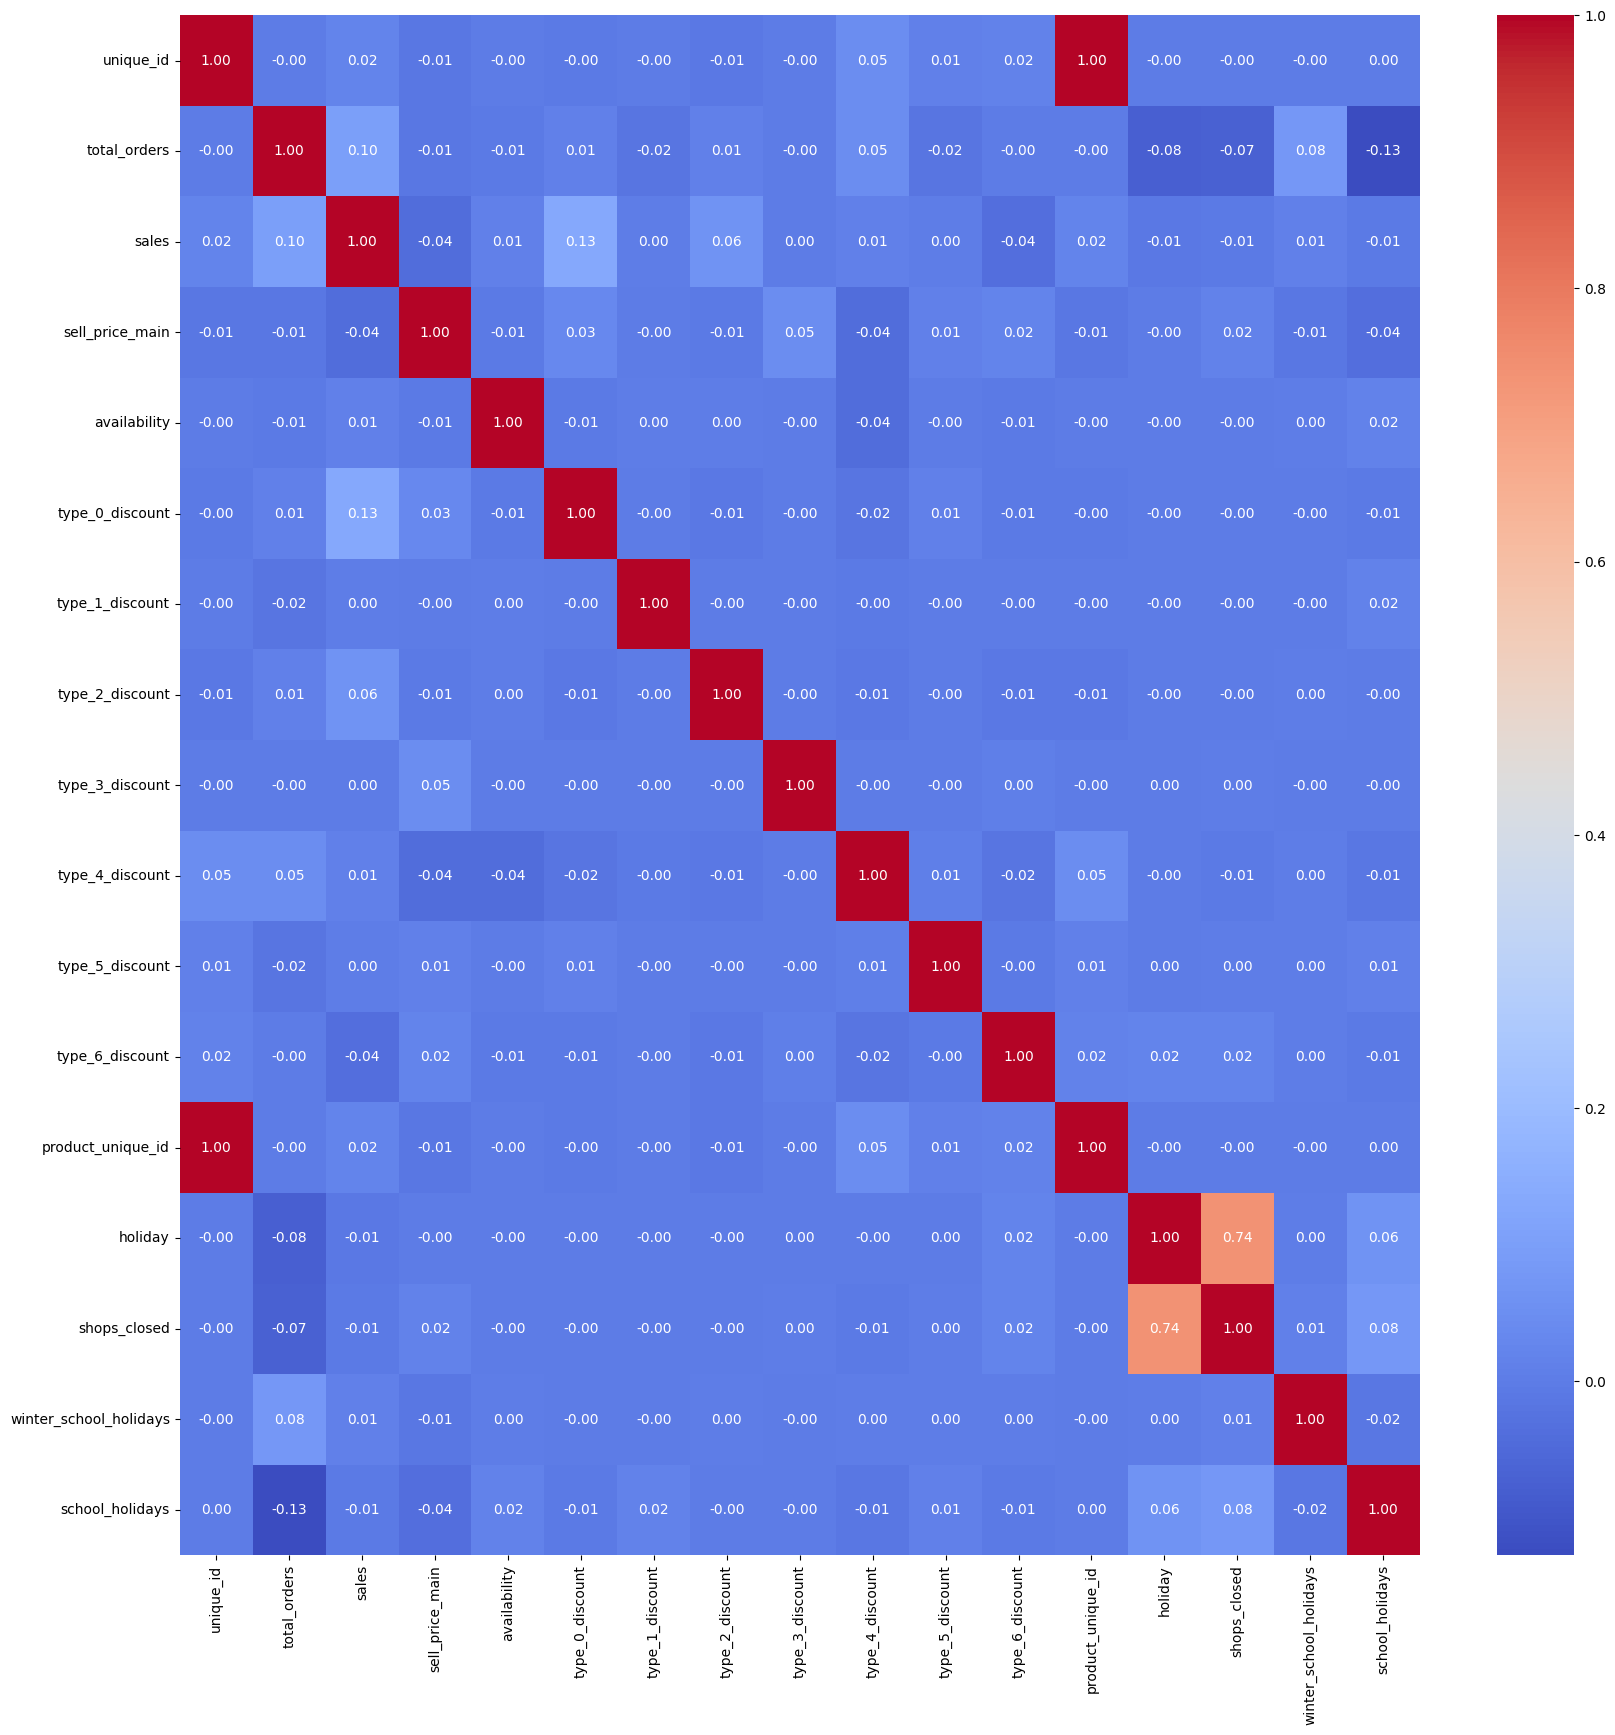

In [50]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.select_dtypes(include=['int', 'float']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Feature Engineering

In [51]:
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['sin_day_of_week'] = np.sin(2 * np.pi * train_df['day_of_week'] / 7)
train_df['cos_day_of_week'] = np.cos(2 * np.pi * train_df['day_of_week'] / 7)
train_df['day_of_year'] = train_df['date'].dt.dayofyear
train_df['week_of_year'] = train_df['date'].dt.isocalendar().week
train_df['week_of_month'] = train_df['date'].dt.day // 7 + 1

In [52]:
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['sin_day_of_week'] = np.sin(2 * np.pi * test_df['day_of_week'] / 7)
test_df['cos_day_of_week'] = np.cos(2 * np.pi * test_df['day_of_week'] / 7)
test_df['day_of_year'] = test_df['date'].dt.dayofyear
test_df['week_of_year'] = test_df['date'].dt.isocalendar().week
test_df['week_of_month'] = test_df['date'].dt.day // 7 + 1

In [53]:
train_df['quarter'] = train_df['date'].dt.quarter
train_df['is_month_start'] = train_df['date'].dt.is_month_start
train_df['is_month_end'] = train_df['date'].dt.is_month_end
train_df['is_quarter_start'] = train_df['date'].dt.is_quarter_start
train_df['is_quarter_end'] = train_df['date'].dt.is_quarter_end
train_df['is_year_start'] = train_df['date'].dt.is_year_start
train_df['is_year_end'] = train_df['date'].dt.is_year_end
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6])
train_df['is_leap_year'] = train_df['date'].dt.is_leap_year

In [54]:
test_df['quarter'] = test_df['date'].dt.quarter
test_df['is_month_start'] = test_df['date'].dt.is_month_start
test_df['is_month_end'] = test_df['date'].dt.is_month_end
test_df['is_quarter_start'] = test_df['date'].dt.is_quarter_start
test_df['is_quarter_end'] = test_df['date'].dt.is_quarter_end
test_df['is_year_start'] = test_df['date'].dt.is_year_start
test_df['is_year_end'] = test_df['date'].dt.is_year_end
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6])
test_df['is_leap_year'] = test_df['date'].dt.is_leap_year

In [55]:
train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,day_of_week,sin_day_of_week,cos_day_of_week,day_of_year,week_of_year,week_of_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,is_leap_year
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2024,3,10,6,-0.781831,0.623490,70,10,2,1,False,False,False,False,False,False,True,True
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2021,5,25,1,0.781831,0.623490,145,21,4,2,False,False,False,False,False,False,False,False
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2021,12,20,0,0.000000,1.000000,354,51,3,4,False,False,False,False,False,False,False,False
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2023,4,29,5,-0.974928,-0.222521,119,17,5,2,False,False,False,False,False,False,True,False
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2022,4,1,4,-0.433884,-0.900969,91,13,1,2,True,False,True,False,False,False,False,False


In [56]:
train_df['orders_per_day'] = train_df.groupby(['date', 'warehouse'])['total_orders'].transform('sum')

In [57]:
test_df['orders_per_day'] = test_df.groupby(['date', 'warehouse'])['total_orders'].transform('sum')

In [58]:
train_df['orders_per_day'].describe()

count    4.007367e+06
mean     3.097610e+06
std      1.598086e+06
min      4.580000e+02
25%      2.088094e+06
50%      2.916047e+06
75%      3.986492e+06
max      1.033270e+07
Name: orders_per_day, dtype: float64

In [59]:
train_df['orders_per_week'] = train_df.groupby(['year', 'week_of_year', 'warehouse'])['total_orders'].transform('sum')
train_df['orders_per_month'] = train_df.groupby(['year', 'month', 'warehouse'])['total_orders'].transform('sum')

In [60]:
test_df['orders_per_week'] = test_df.groupby(['year', 'week_of_year', 'warehouse'])['total_orders'].transform('sum')
test_df['orders_per_month'] = test_df.groupby(['year', 'month', 'warehouse'])['total_orders'].transform('sum')

In [61]:
train_df['avg_orders_per_week'] = train_df.groupby(['week_of_year', 'warehouse'])['orders_per_week'].transform('mean')
train_df['avg_orders_per_month'] = train_df.groupby(['month', 'warehouse'])['orders_per_month'].transform('mean')

In [62]:
test_df['avg_orders_per_week'] = test_df.groupby(['week_of_year', 'warehouse'])['orders_per_week'].transform('mean')
test_df['avg_orders_per_month'] = test_df.groupby(['month', 'warehouse'])['orders_per_month'].transform('mean')

In [63]:
train_df['max_orders_per_week'] = train_df.groupby(['week_of_year', 'warehouse'])['orders_per_week'].transform('max')
train_df['max_orders_per_month'] = train_df.groupby(['month', 'warehouse'])['orders_per_month'].transform('max')
train_df['min_orders_per_week'] = train_df.groupby(['week_of_year', 'warehouse'])['orders_per_week'].transform('min')
train_df['min_orders_per_month'] = train_df.groupby(['month', 'warehouse'])['orders_per_month'].transform('min')
train_df['median_orders_per_week'] = train_df.groupby(['week_of_year', 'warehouse'])['orders_per_week'].transform('median')
train_df['median_orders_per_month'] = train_df.groupby(['month', 'warehouse'])['orders_per_month'].transform('median')

In [64]:
test_df['max_orders_per_week'] = test_df.groupby(['week_of_year', 'warehouse'])['orders_per_week'].transform('max')
test_df['max_orders_per_month'] = test_df.groupby(['month', 'warehouse'])['orders_per_month'].transform('max')
test_df['min_orders_per_week'] = test_df.groupby(['week_of_year', 'warehouse'])['orders_per_week'].transform('min')
test_df['min_orders_per_month'] = test_df.groupby(['month', 'warehouse'])['orders_per_month'].transform('min')
test_df['median_orders_per_week'] = test_df.groupby(['week_of_year', 'warehouse'])['orders_per_week'].transform('median')
test_df['median_orders_per_month'] = test_df.groupby(['month', 'warehouse'])['orders_per_month'].transform('median')

In [65]:
train_df['total_discount'] = train_df['type_0_discount'] + train_df['type_1_discount'] + train_df['type_2_discount'] + train_df['type_3_discount'] + train_df['type_4_discount'] + train_df['type_5_discount'] + train_df['type_6_discount']

In [66]:
test_df['total_discount'] = test_df['type_0_discount'] + test_df['type_1_discount'] + test_df['type_2_discount'] + test_df['type_3_discount'] + test_df['type_4_discount'] + test_df['type_5_discount'] + test_df['type_6_discount']

In [67]:
train_df['max_discount'] = train_df[['type_0_discount', 'type_1_discount', 'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount']].max(axis=1)

In [68]:
test_df['max_discount'] = test_df[['type_0_discount', 'type_1_discount', 'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount']].max(axis=1)

In [69]:
train_df['average_discount'] = train_df[['type_0_discount', 'type_1_discount', 'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount']].mean(axis=1)


In [70]:
test_df['average_discount'] = test_df[['type_0_discount', 'type_1_discount', 'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount']].mean(axis=1)

In [71]:
train_df['median_discount'] = train_df[['type_0_discount', 'type_1_discount', 'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount']].median(axis=1)

In [72]:
test_df['median_discount'] = test_df[['type_0_discount', 'type_1_discount', 'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount']].median(axis=1)

In [73]:
train_df['product_sold_in_a_day'] = train_df.groupby(['date'])['unique_id'].transform('nunique')

In [74]:
train_df['product_sold_in_a_day'].describe().round(2)

count    4007367.00
mean        2970.58
std          534.23
min         1559.00
25%         2544.00
50%         3166.00
75%         3431.00
max         3622.00
Name: product_sold_in_a_day, dtype: float64

In [75]:
train_df['unique_products_sold_in_a_day'] = train_df.groupby(['date'])['product_unique_id'].transform('nunique')

In [76]:
train_df['unique_products_sold_in_a_day'].describe().round(2)

count    4007367.00
mean        1351.28
std          294.58
min          681.00
25%         1126.00
50%         1487.00
75%         1600.00
max         1683.00
Name: unique_products_sold_in_a_day, dtype: float64

In [77]:
test_df['product_sold_in_a_day'] = test_df.groupby(['date'])['unique_id'].transform('nunique')

In [78]:
test_df['unique_products_sold_in_a_day'] = test_df.groupby(['date'])['product_unique_id'].transform('nunique')

In [79]:
train_df['warehouse_city'] = train_df['warehouse'].str.split('_').str[0]

In [80]:
test_df['warehouse_city'] = test_df['warehouse'].str.split('_').str[0]

In [81]:
train_warehouse_city_encoded = pd.get_dummies(train_df['warehouse_city'], prefix='warehouse_city', drop_first=True)

In [82]:
train_df = pd.concat([train_df, train_warehouse_city_encoded], axis=1)

In [83]:
test_warehouse_city_encoded = pd.get_dummies(test_df['warehouse_city'], prefix='warehouse_city', drop_first=True)

In [84]:
test_df = pd.concat([test_df, test_warehouse_city_encoded], axis=1)

In [85]:
train_df['product_unique_id'].nunique()

2653

In [86]:
train_df['unique_id'].nunique()

5390

In [87]:
train_df.groupby("product_unique_id")['warehouse'].nunique()[train_df.groupby("product_unique_id")['warehouse'].nunique() > 1]

product_unique_id
1       2
4       2
7       4
11      2
12      4
13      4
15      2
17      2
18      4
22      4
23      4
24      4
25      4
26      4
28      4
29      2
31      3
33      4
34      4
37      2
38      4
40      4
41      2
42      4
45      3
47      3
48      3
50      2
53      4
56      2
58      4
59      4
61      4
66      4
68      2
75      2
77      3
78      3
79      3
80      4
82      4
83      3
85      3
86      2
87      2
89      3
94      2
95      2
103     4
106     4
107     2
112     4
114     2
115     2
116     4
119     4
120     2
124     4
126     3
129     4
130     4
131     2
133     4
137     4
142     4
144     4
147     4
149     4
152     3
153     2
155     2
163     4
165     4
166     4
167     2
170     2
174     4
177     4
179     4
180     4
181     4
182     2
183     2
187     2
190     4
195     2
196     2
198     2
200     4
203     4
206     3
207     2
210     4
211     2
214     2
216     2
217     2
218     2
21

In [88]:
train_df['is_product_available_in_other_warehouse'] = train_df['product_unique_id'].isin(train_df.groupby("product_unique_id")['warehouse'].nunique()[train_df.groupby("product_unique_id")['warehouse'].nunique() > 1].index)

In [89]:
train_df['is_product_available_in_other_warehouse'].value_counts(normalize=True)

is_product_available_in_other_warehouse
True     0.798459
False    0.201541
Name: proportion, dtype: float64

In [90]:
test_df['is_product_available_in_other_warehouse'] = test_df['product_unique_id'].isin(train_df.groupby("product_unique_id")['warehouse'].nunique()[train_df.groupby("product_unique_id")['warehouse'].nunique() > 1].index)

In [91]:
test_df['is_product_available_in_other_warehouse'].value_counts(normalize=True)

is_product_available_in_other_warehouse
True     0.783544
False    0.216456
Name: proportion, dtype: float64

In [92]:
train_df['warehouse'].value_counts()

warehouse
Prague_1       780566
Prague_3       779655
Prague_2       770709
Brno_1         643637
Budapest_1     574582
Munich_1       259287
Frankfurt_1    198931
Name: count, dtype: int64

In [93]:
train_warehouse_encoded = pd.get_dummies(train_df['warehouse'], drop_first=True)

In [94]:
train_df = pd.concat([train_df, train_warehouse_encoded], axis=1)

In [95]:
test_warehouse_encoded = pd.get_dummies(test_df['warehouse'], drop_first=True)

In [96]:
test_df = pd.concat([test_df, test_warehouse_encoded], axis=1)

In [97]:
train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,day_of_week,sin_day_of_week,cos_day_of_week,day_of_year,week_of_year,week_of_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,is_leap_year,orders_per_day,orders_per_week,orders_per_month,avg_orders_per_week,avg_orders_per_month,max_orders_per_week,max_orders_per_month,min_orders_per_week,min_orders_per_month,median_orders_per_week,median_orders_per_month,total_discount,max_discount,average_discount,median_discount,product_sold_in_a_day,unique_products_sold_in_a_day,warehouse_city,warehouse_city_Budapest,warehouse_city_Frankfurt,warehouse_city_Munich,warehouse_city_Prague,is_product_available_in_other_warehouse,Budapest_1,Frankfurt_1,Munich_1,Prague_1,Prague_2,Prague_3
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2024,3,10,6,-0.781831,0.623490,70,10,2,1,False,False,False,False,False,False,True,True,3170272.0,23608387.0,100048350.0,1.826613e+07,7.961028e+07,23608387.0,100048350.0,11108206.0,49693862.0,19585847.0,86742904.0,0.15312,0.15312,0.021874,0.0,3456,1599,Budapest,True,False,False,False,False,True,False,False,False,False,False
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2021,5,25,1,0.781831,0.623490,145,21,4,2,False,False,False,False,False,False,False,False,1407186.0,10162900.0,46802536.0,1.694879e+07,7.712751e+07,21191206.0,97286896.0,10162900.0,46802536.0,18713202.0,84382536.0,0.15025,0.15025,0.021464,0.0,2243,880,Budapest,True,False,False,False,False,True,False,False,False,False,False
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2021,12,20,0,0.000000,1.000000,354,51,3,4,False,False,False,False,False,False,False,False,2385303.0,11437414.0,62926760.0,1.777301e+07,7.697841e+07,26004839.0,102598217.0,11048812.0,44150750.0,18382489.0,83162847.0,0.15025,0.15025,0.021464,0.0,2621,1171,Budapest,True,False,False,False,False,True,False,False,False,False,False
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2023,4,29,5,-0.974928,-0.222521,119,17,5,2,False,False,False,False,False,False,True,False,2718809.0,19614703.0,79311572.0,1.755913e+07,7.410335e+07,22290842.0,94841168.0,10587709.0,46090668.0,19614703.0,79311572.0,0.35336,0.20024,0.050480,0.0,3390,1587,Budapest,True,False,False,False,False,True,False,False,False,False,False
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2022,4,1,4,-0.433884,-0.900969,91,13,1,2,True,False,True,False,False,False,False,False,2423856.0,15800556.0,64965645.0,1.742707e+07,7.410335e+07,21213729.0,94841168.0,9492543.0,46090668.0,20073623.0,79311572.0,0.15649,0.15649,0.022356,0.0,2896,1295,Budapest,True,False,False,False,False,True,False,False,False,False,False


In [98]:
train_df['mean_product_price'] = train_df.groupby(['product_unique_id'])['sell_price_main'].transform('mean')
train_df['median_product_price'] = train_df.groupby(['product_unique_id'])['sell_price_main'].transform('median')
train_df['max_product_price'] = train_df.groupby(['product_unique_id'])['sell_price_main'].transform('max')
train_df['min_product_price'] = train_df.groupby(['product_unique_id'])['sell_price_main'].transform('min')
train_df['std_product_price'] = train_df.groupby(['product_unique_id'])['sell_price_main'].transform('std')

In [99]:
test_df['mean_product_price'] = test_df.groupby(['product_unique_id'])['sell_price_main'].transform('mean')
test_df['median_product_price'] = test_df.groupby(['product_unique_id'])['sell_price_main'].transform('median')
test_df['max_product_price'] = test_df.groupby(['product_unique_id'])['sell_price_main'].transform('max')
test_df['min_product_price'] = test_df.groupby(['product_unique_id'])['sell_price_main'].transform('min')
test_df['std_product_price'] = test_df.groupby(['product_unique_id'])['sell_price_main'].transform('std')

In [100]:
train_df['mean_warehouse_product_price'] = train_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('mean')
train_df['median_warehouse_product_price'] = train_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('median')
train_df['max_warehouse_product_price'] = train_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('max')
train_df['min_warehouse_product_price'] = train_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('min')
train_df['std_warehouse_product_price'] = train_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('std')

In [101]:
test_df['mean_warehouse_product_price'] = test_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('mean')
test_df['median_warehouse_product_price'] = test_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('median')
test_df['max_warehouse_product_price'] = test_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('max')
test_df['min_warehouse_product_price'] = test_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('min')
test_df['std_warehouse_product_price'] = test_df.groupby(['warehouse', 'unique_id'])['sell_price_main'].transform('std')

In [102]:
train_df['mean_product_availability_in_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['availability'].transform('mean')
train_df['median_product_availability_in_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['availability'].transform('median')
train_df['max_product_availability_in_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['availability'].transform('max')
train_df['min_product_availability_in_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['availability'].transform('min')
train_df['std_product_availability_in_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['availability'].transform('std')

In [103]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
for i, group in tqdm(test_df.groupby(['warehouse', 'unique_id'])):
    train_group = train_df[(train_df['warehouse'] == i[0]) & (train_df['unique_id'] == i[1])]
    test_df.loc[group.index, 'mean_product_availability_in_warehouse'] = train_group['availability'].mean()
    test_df.loc[group.index, 'median_product_availability_in_warehouse'] = train_group['availability'].median()
    test_df.loc[group.index, 'max_product_availability_in_warehouse'] = train_group['availability'].max()
    test_df.loc[group.index, 'min_product_availability_in_warehouse'] = train_group['availability'].min()
    test_df.loc[group.index, 'std_product_availability_in_warehouse'] = train_group['availability'].std() 

 20%|██        | 734/3625 [01:50<06:58,  6.90it/s]

In [ ]:
train_df['mean_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['sales'].transform('mean')
train_df['median_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['sales'].transform('median')
train_df['max_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['sales'].transform('max')
train_df['min_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['sales'].transform('min')
train_df['std_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id'])['sales'].transform('std')


In [ ]:
for i, group in tqdm(test_df.groupby(['warehouse', 'unique_id'])):
    train_group = train_df[(train_df['warehouse'] == i[0]) & (train_df['unique_id'] == i[1])]
    test_df.loc[group.index, 'mean_sales_per_product_warehouse'] = train_group['sales'].mean()
    test_df.loc[group.index, 'median_sales_per_product_warehouse'] = train_group['sales'].median()
    test_df.loc[group.index, 'max_sales_per_product_warehouse'] = train_group['sales'].max()
    test_df.loc[group.index, 'min_sales_per_product_warehouse'] = train_group['sales'].min()
    test_df.loc[group.index, 'std_sales_per_product_warehouse'] = train_group['sales'].std()

100%|██████████| 3625/3625 [13:14<00:00,  4.56it/s] 


In [ ]:
train_df['mean_sales_per_unique_product'] = train_df.groupby(['product_unique_id'])['sales'].transform('mean')
train_df['median_sales_per_unique_product'] = train_df.groupby(['product_unique_id'])['sales'].transform('median')
train_df['max_sales_per_unique_product'] = train_df.groupby(['product_unique_id'])['sales'].transform('max')
train_df['min_sales_per_unique_product'] = train_df.groupby(['product_unique_id'])['sales'].transform('min')
train_df['std_sales_per_unique_product'] = train_df.groupby(['product_unique_id'])['sales'].transform('std')

In [ ]:
for i, group in tqdm(test_df.groupby(['warehouse', 'unique_id'])):
    train_group = train_df[(train_df['warehouse'] == i[0]) & (train_df['unique_id'] == i[1])]
    test_df.loc[group.index, 'mean_sales_per_product_warehouse'] = train_group['sales'].mean()
    test_df.loc[group.index, 'median_sales_per_product_warehouse'] = train_group['sales'].median()
    test_df.loc[group.index, 'max_sales_per_product_warehouse'] = train_group['sales'].max()
    test_df.loc[group.index, 'min_sales_per_product_warehouse'] = train_group['sales'].min()
    test_df.loc[group.index, 'std_sales_per_product_warehouse'] = train_group['sales'].std()

100%|██████████| 3625/3625 [08:50<00:00,  6.84it/s]


In [ ]:
train_df['mean_weekend_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id', 'is_weekend'])['sales'].transform('mean')
train_df['median_weekend_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id', 'is_weekend'])['sales'].transform('median')
train_df['max_weekend_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id', 'is_weekend'])['sales'].transform('max')
train_df['min_weekend_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id', 'is_weekend'])['sales'].transform('min')
train_df['std_weekend_sales_per_product_warehouse'] = train_df.groupby(['warehouse', 'unique_id', 'is_weekend'])['sales'].transform('std')

In [ ]:
for i, group in tqdm(test_df.groupby(['warehouse', 'unique_id', 'is_weekend'])):
    train_group = train_df[(train_df['warehouse'] == i[0]) & (train_df['unique_id'] == i[1]) & (train_df['is_weekend'] == i[2])]
    test_df.loc[group.index, 'mean_weekend_sales_per_product_warehouse'] = train_group['sales'].mean()
    test_df.loc[group.index, 'median_weekend_sales_per_product_warehouse'] = train_group['sales'].median()
    test_df.loc[group.index, 'max_weekend_sales_per_product_warehouse'] = train_group['sales'].max()
    test_df.loc[group.index, 'min_weekend_sales_per_product_warehouse'] = train_group['sales'].min()
    test_df.loc[group.index, 'std_weekend_sales_per_product_warehouse'] = train_group['sales'].std()

100%|██████████| 7156/7156 [17:42<00:00,  6.74it/s]


In [ ]:
train_df['mean_weekend_sales_per_product'] = train_df.groupby(['product_unique_id', 'is_weekend'])['sales'].transform('mean')
train_df['median_weekend_sales_per_product'] = train_df.groupby(['product_unique_id', 'is_weekend'])['sales'].transform('median')
train_df['max_weekend_sales_per_product'] = train_df.groupby(['product_unique_id', 'is_weekend'])['sales'].transform('max')
train_df['min_weekend_sales_per_product'] = train_df.groupby(['product_unique_id', 'is_weekend'])['sales'].transform('min')
train_df['std_weekend_sales_per_product'] = train_df.groupby(['product_unique_id', 'is_weekend'])['sales'].transform('std')

In [ ]:
for i, group in tqdm(test_df.groupby(['product_unique_id', 'is_weekend'])):
    train_group = train_df[(train_df['product_unique_id'] == i[0]) & (train_df['is_weekend'] == i[1])]
    test_df.loc[group.index, 'mean_weekend_sales_per_product'] = train_group['sales'].mean()
    test_df.loc[group.index, 'median_weekend_sales_per_product'] = train_group['sales'].median()
    test_df.loc[group.index, 'max_weekend_sales_per_product'] = train_group['sales'].max()
    test_df.loc[group.index, 'min_weekend_sales_per_product'] = train_group['sales'].min()
    test_df.loc[group.index, 'std_weekend_sales_per_product'] = train_group['sales'].std()

100%|██████████| 3302/3302 [00:25<00:00, 128.18it/s]


In [ ]:
train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,day_of_week,sin_day_of_week,cos_day_of_week,day_of_year,week_of_year,week_of_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,is_leap_year,orders_per_day,orders_per_week,orders_per_month,avg_orders_per_week,avg_orders_per_month,total_discount,max_discount,average_discount,median_discount,product_sold_in_a_day,unique_products_sold_in_a_day,warehouse_city,is_product_available_in_other_warehouse,mean_product_price,median_product_price,max_product_price,min_product_price,std_product_price,mean_warehouse_product_price,median_warehouse_product_price,max_warehouse_product_price,min_warehouse_product_price,std_warehouse_product_price,mean_product_availability_in_warehouse,median_product_availability_in_warehouse,max_product_availability_in_warehouse,min_product_availability_in_warehouse,std_product_availability_in_warehouse,mean_sales_per_product_warehouse,median_sales_per_product_warehouse,max_sales_per_product_warehouse,min_sales_per_product_warehouse,std_sales_per_product_warehouse,mean_sales_per_unique_product,median_sales_per_unique_product,max_sales_per_unique_product,min_sales_per_unique_product,std_sales_per_unique_product,mean_weekend_sales_per_product_warehouse,median_weekend_sales_per_product_warehouse,max_weekend_sales_per_product_warehouse,min_weekend_sales_per_product_warehouse,std_weekend_sales_per_product_warehouse,mean_weekend_sales_per_product,median_weekend_sales_per_product,max_weekend_sales_per_product,min_weekend_sales_per_product,std_weekend_sales_per_product
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2024,3,10,6,-0.781831,0.623490,70,10,2,1,False,False,False,False,False,False,True,True,3170272.0,23608387.0,100048350.0,1.826613e+07,7.961028e+07,0.15312,0.15312,0.021874,0.0,3456,1599,Budapest,False,555.608654,532.08,646.26,455.96,84.227518,555.608654,532.08,646.26,455.96,84.227518,0.983828,1.0,1.0,0.01,0.092726,21.746397,20.655,66.49,0.0,10.68388,21.746397,20.655,66.49,0.0,10.68388,19.775553,19.37,54.02,0.0,10.203391,19.775553,19.37,54.02,0.0,10.203391
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2021,5,25,1,0.781831,0.623490,145,21,4,2,False,False,False,False,False,False,False,False,1407186.0,10162900.0,46802536.0,1.694879e+07,7.712751e+07,0.15025,0.15025,0.021464,0.0,2243,880,Budapest,False,555.608654,532.08,646.26,455.96,84.227518,555.608654,532.08,646.26,455.96,84.227518,0.983828,1.0,1.0,0.01,0.092726,21.746397,20.655,66.49,0.0,10.68388,21.746397,20.655,66.49,0.0,10.68388,22.550082,21.47,66.49,0.0,10.775748,22.550082,21.47,66.49,0.0,10.775748
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2021,12,20,0,0.000000,1.000000,354,51,3,4,False,False,False,False,False,False,False,False,2385303.0,11437414.0,62926760.0,1.777301e+07,7.697841e+07,0.15025,0.15025,0.021464,0.0,2621,1171,Budapest,False,555.608654,532.08,646.26,455.96,84.227518,555.608654,532.08,646.26,455.96,84.227518,0.983828,1.0,1.0,0.01,0.092726,21.746397,20.655,66.49,0.0,10.68388,21.746397,20.655,66.49,0.0,10.68388,22.550082,21.47,66.49,0.0,10.775748,22.550082,21.47,66.49,0.0,10.775748
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2023,4,29,5,-0.974928,-

In [ ]:
train_df['name'].value_counts(normalize=True)

name
Banana_10              0.001399
Toust_13               0.001399
Date_1                 0.001398
Orange_14              0.001398
Bread_198              0.001397
Toust_36               0.001397
Bread_113              0.001397
Mushroom_14            0.001396
Bell Pepper_5          0.001396
Pastry_98              0.001396
Bread_183              0.001396
Zucchini_1             0.001395
Mint_0                 0.001395
Shallot_2              0.001395
Thyme_1                0.001393
Sweet Potato_0         0.001393
Parsley_0              0.001393
Lime_4                 0.001393
Mushroom_8             0.001393
Coriander_8            0.001392
Carrot_33              0.001392
Herb_10                0.001392
Mushroom_3             0.001391
Carrot_20              0.001391
Mushroom_15            0.001391
Onion_52               0.001391
Chicken_73             0.001390
Bread_129              0.001389
Basil_2                0.001389
Rosemary_2             0.001389
Bread_165              0.001388
Bee

In [ ]:
train_df['name_category'] = train_df['name'].str.split('_').str[0]
train_df['name_category'] = train_df['name_category'].str.lower()

In [ ]:
train_df['name_category'].value_counts(normalize=True)

name_category
bread                0.102680
pastry               0.085483
chicken              0.059736
tomato               0.031596
roll                 0.029145
toust                0.028117
apple                0.026628
baguette             0.025127
potato               0.024627
pork                 0.023064
croissant            0.020562
onion                0.017683
mushroom             0.017281
beef                 0.016476
salad                0.014775
lettuce              0.014306
carrot               0.013406
donut                0.013179
cabbage              0.012955
tortilla             0.012876
pepper               0.012105
herb                 0.011938
bell pepper          0.011626
parsley              0.011218
cucumber             0.010418
pear                 0.009833
snack                0.009749
vegetable            0.009660
avocado              0.009317
radish               0.008959
orange               0.008930
salmon               0.008716
turkey               0.008

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder()

In [ ]:
train_df['name_category_encoded'] = oe.fit_transform(train_df[['name_category']])

In [ ]:
test_df['name_category'] = test_df['name'].str.split('_').str[0]
test_df['name_category'] = test_df['name_category'].str.lower()

In [ ]:
test_df['name_category_encoded'] = oe.transform(test_df[['name_category']])

In [ ]:
train_df['L1_category_name_en'].value_counts(normalize=True)

L1_category_name_en
Fruit and vegetable    0.504987
Bakery                 0.372526
Meat and fish          0.122487
Name: proportion, dtype: float64

In [ ]:
train_df['mean_sales_per_L1_category'] = train_df.groupby(['L1_category_name_en'])['sales'].transform('mean')
train_df['median_sales_per_L1_category'] = train_df.groupby(['L1_category_name_en'])['sales'].transform('median')
train_df['max_sales_per_L1_category'] = train_df.groupby(['L1_category_name_en'])['sales'].transform('max')
train_df['min_sales_per_L1_category'] = train_df.groupby(['L1_category_name_en'])['sales'].transform('min')
train_df['std_sales_per_L1_category'] = train_df.groupby(['L1_category_name_en'])['sales'].transform('std')

In [ ]:
for i, group in tqdm(test_df.groupby(['L1_category_name_en'])):
    train_group = train_df[(train_df['L1_category_name_en'] == i)]
    test_df.loc[group.index, 'mean_sales_per_L1_category'] = train_group['sales'].mean()
    test_df.loc[group.index, 'median_sales_per_L1_category'] = train_group['sales'].median()
    test_df.loc[group.index, 'max_sales_per_L1_category'] = train_group['sales'].max()
    test_df.loc[group.index, 'min_sales_per_L1_category'] = train_group['sales'].min()
    test_df.loc[group.index, 'std_sales_per_L1_category'] = train_group['sales'].std()

100%|██████████| 3/3 [00:00<00:00,  4.96it/s]


In [ ]:
train_L1_category_encoded = pd.get_dummies(train_df['L1_category_name_en'], prefix='L1_category', drop_first=True)

In [ ]:
train_df = pd.concat([train_df, train_L1_category_encoded], axis=1)

In [ ]:
test_L1_category_encoded = pd.get_dummies(test_df['L1_category_name_en'], prefix='L1_category', drop_first=True)

In [ ]:
test_df = pd.concat([test_df, test_L1_category_encoded], axis=1)

In [ ]:
train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,day_of_week,sin_day_of_week,cos_day_of_week,day_of_year,week_of_year,week_of_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,is_leap_year,orders_per_day,orders_per_week,orders_per_month,avg_orders_per_week,avg_orders_per_month,total_discount,max_discount,average_discount,median_discount,product_sold_in_a_day,unique_products_sold_in_a_day,warehouse_city,is_product_available_in_other_warehouse,mean_product_price,median_product_price,max_product_price,min_product_price,std_product_price,mean_warehouse_product_price,median_warehouse_product_price,max_warehouse_product_price,min_warehouse_product_price,std_warehouse_product_price,mean_product_availability_in_warehouse,median_product_availability_in_warehouse,max_product_availability_in_warehouse,min_product_availability_in_warehouse,std_product_availability_in_warehouse,mean_sales_per_product_warehouse,median_sales_per_product_warehouse,max_sales_per_product_warehouse,min_sales_per_product_warehouse,std_sales_per_product_warehouse,mean_sales_per_unique_product,median_sales_per_unique_product,max_sales_per_unique_product,min_sales_per_unique_product,std_sales_per_unique_product,mean_weekend_sales_per_product_warehouse,median_weekend_sales_per_product_warehouse,max_weekend_sales_per_product_warehouse,min_weekend_sales_per_product_warehouse,std_weekend_sales_per_product_warehouse,mean_weekend_sales_per_product,median_weekend_sales_per_product,max_weekend_sales_per_product,min_weekend_sales_per_product,std_weekend_sales_per_product,name_category,Budapest_1,Frankfurt_1,Munich_1,Prague_1,Prague_2,Prague_3,warehouse_city_Budapest,warehouse_city_Frankfurt,warehouse_city_Munich,warehouse_city_Prague,mean_sales_per_L1_category,median_sales_per_L1_category,max_sales_per_L1_category,min_sales_per_L1_category,std_sales_per_L1_category,name_category_encoded,L1_category_Fruit and vegetable,L1_category_Meat and fish
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2024,3,10,6,-0.781831,0.623490,70,10,2,1,False,False,False,False,False,False,True,True,3170272.0,23608387.0,100048350.0,1.826613e+07,7.961028e+07,0.15312,0.15312,0.021874,0.0,3456,1599,Budapest,False,555.608654,532.08,646.26,455.96,84.227518,555.608654,532.08,646.26,455.96,84.227518,0.983828,1.0,1.0,0.01,0.092726,21.746397,20.655,66.49,0.0,10.68388,21.746397,20.655,66.49,0.0,10.68388,19.775553,19.37,54.02,0.0,10.203391,19.775553,19.37,54.02,0.0,10.203391,croissant,True,False,False,False,False,False,True,False,False,False,121.769964,36.01,26316.19,0.0,529.150318,56.0,False,False
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2021,5,25,1,0.781831,0.623490,145,21,4,2,False,False,False,False,False,False,False,False,1407186.0,10162900.0,46802536.0,1.694879e+07,7.712751e+07,0.15025,0.15025,0.021464,0.0,2243,880,Budapest,False,555.608654,532.08,646.26,455.96,84.227518,555.608654,532.08,646.26,455.96,84.227518,0.983828,1.0,1.0,0.01,0.092726,21.746397,20.655,66.49,0.0,10.68388,21.746397,20.655,66.49,0.0,10.68388,22.550082,21.47,66.49,0.0,10.775748,22.550082,21.47,66.49,0.0,10.775748,croissant,True,False,False,False,False,False,True,False,False,False,121.769964,36.01,26316.19,0.0,529.150318,56.0,False,False
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,NaN,0,0,0,0,2021,12,20,0,0.00

In [ ]:
import lightgbm as lgb

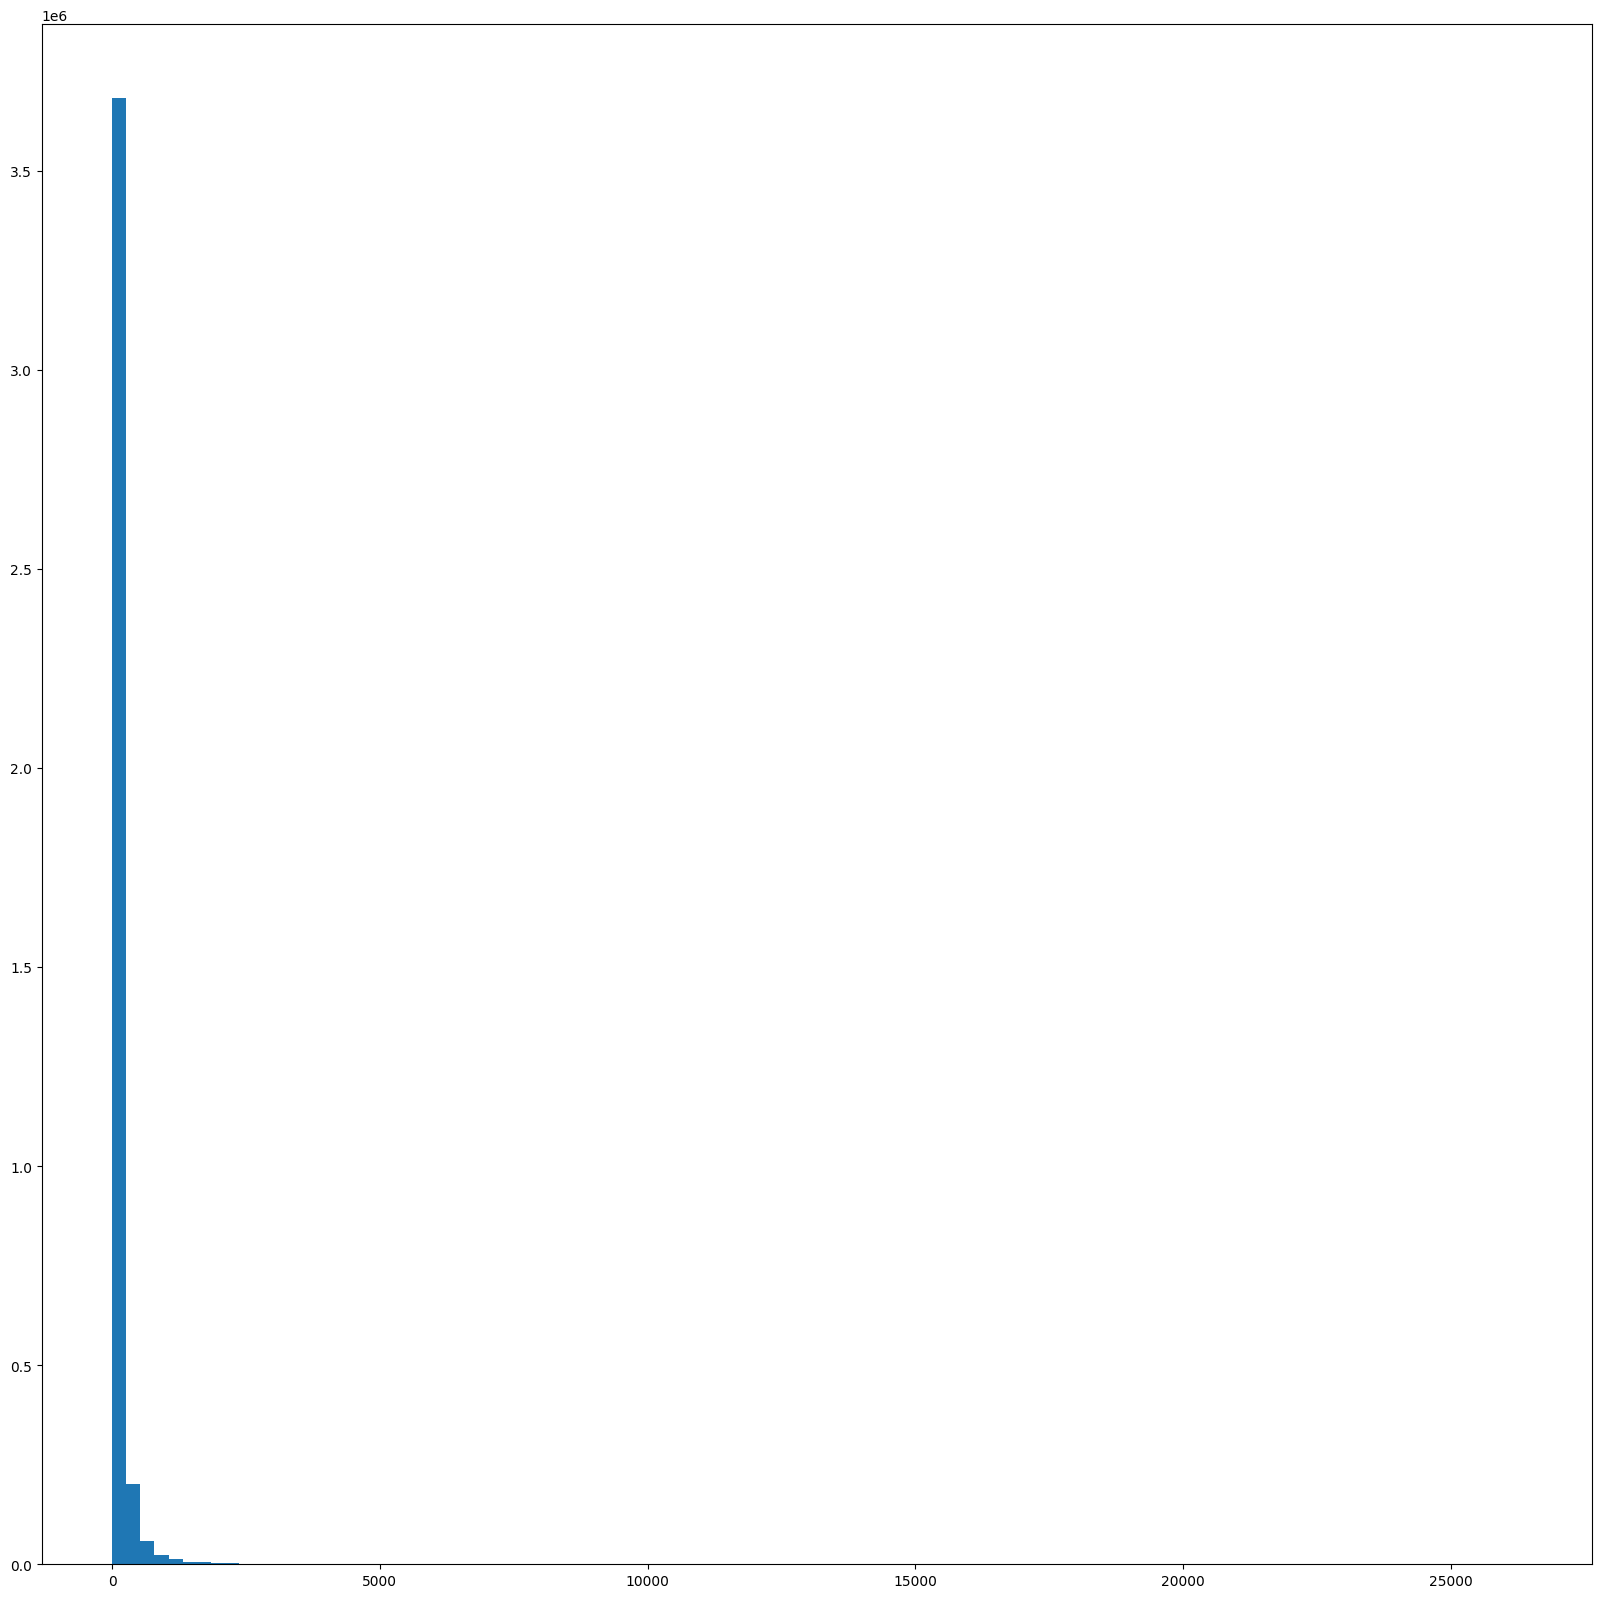

In [ ]:
plt.figure(figsize=(20, 20))
plt.hist(train_df['sales'], bins=100)
plt.show()

In [ ]:
train_df['log_sales'] = np.log1p(train_df['sales'])

In [ ]:
bool_cols = train_df.select_dtypes(include='bool').columns

In [ ]:
for col in bool_cols:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

In [ ]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_cols

['warehouse',
 'name',
 'L1_category_name_en',
 'L2_category_name_en',
 'L3_category_name_en',
 'L4_category_name_en',
 'holiday_name',
 'warehouse_city',
 'name_category']

In [ ]:
train_df.drop(columns=['warehouse', 'warehouse_city', 'holiday_name', 'L1_category_name_en', 'name', 'name_category'], inplace=True)
test_df.drop(columns=['warehouse', 'warehouse_city', 'holiday_name', 'L1_category_name_en', 'name', 'name_category'], inplace=True)

In [ ]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_cols

['L2_category_name_en', 'L3_category_name_en', 'L4_category_name_en']

In [ ]:
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, valid = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
lgb_train = lgb.Dataset(train.drop(columns=['date', 'sales', 'log_sales', 'availability']), label=train_df['log_sales'], categorical_feature=categorical_cols, free_raw_data=False)


In [ ]:
lgb_valid = lgb.Dataset(valid.drop(columns=['date', 'sales', 'log_sales', 'availability']), label=valid['log_sales'], categorical_feature=categorical_cols, free_raw_data=False)

In [ ]:
lgb_test = lgb.Dataset(test_df.drop(columns=['date']), categorical_feature=categorical_cols, free_raw_data=False, reference=lgb_train)

In [ ]:
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': 10,
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 50,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'max_depth': 15,
    'seed': 42,
    "min_data_in_leaf": 5
}

In [ ]:
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train, lgb_valid], num_boost_round=500)

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.906433
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.302710
[LightGBM] [Debug] init for col-wise cost 0.340657 seconds, init for row-wise cost 0.545536 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.403747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 13677
[LightGBM] [Info] Number of data points in the train set: 3205893, number of used features: 99
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Debug] Re-bagging, using 2565699 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

: 